# *Statystyczna Analiza Danych – projekt*
*Maciej Przybysz (nr indeksu 176845)*
## *Analiza danych użytkowników kart kredytowych z Tajwanu*

### Opis problemu 
W pracy tej została przedstawiona analiza użytkowników kart kredytowych. Baza danych pochodzi z serwisu kaggle.com i zawiera informacje o użytkownikach kart kredytowych z Tajwanu. Ich przedział czasowy to od kwietnia do września 2005. roku. Rekordy zawierają między innymi: 
* Wielkość limitu kredytowego (w dolarach tajwaśnkich, NT$), 
* Płeć użytkownika: 
1 Mężczyzna,
2 Kobieta,
* Wiek użytkownika oraz
* Stopień uzyskanego wykształcenia:
1 Studia wyższe,
2 Uniwersytet,
3 Liceum,
4 Inne,
5 Nieznane,
6 Nieznane.

Przedstawiona została analiza powyższych danych, a właściwie metodą analizy skupień wyznaczone zostały grupy rekordów sklasyfikowanych jako podobne. 

### Import podstawowych bibliotek do statystyki

In [173]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

### Import danych

In [174]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
df = df[['AGE', 'EDUCATION', 'LIMIT_BAL']]
# Liczbę danych skrócono, z uwagi na edukacyjny charakter pracy i szybkość obliczeń
df = df.head(1000)

### Wstępna analiza danych

Pięć pierwszych rekordów, mających na celu przybliżenie rodzaju danych

In [175]:
df.head()

AGE  EDUCATION  LIMIT_BAL
0   24          2    20000.0
1   26          2   120000.0
2   34          2    90000.0
3   37          2    50000.0
4   57          2    50000.0

Podstawowa statystyka

In [176]:
df.describe()

AGE    EDUCATION      LIMIT_BAL
count  1000.00000  1000.000000    1000.000000
mean     34.93800     1.776000  167080.000000
std       9.22818     0.749924  130632.838668
min      21.00000     1.000000   10000.000000
25%      28.00000     1.000000   50000.000000
50%      33.00000     2.000000  140000.000000
75%      41.00000     2.000000  240000.000000
max      75.00000     6.000000  700000.000000

Wykres trójwymiarowy przedstawiający dane w zależności od wieku, stopnia zdobytego wykształcenia oraz limitu konta

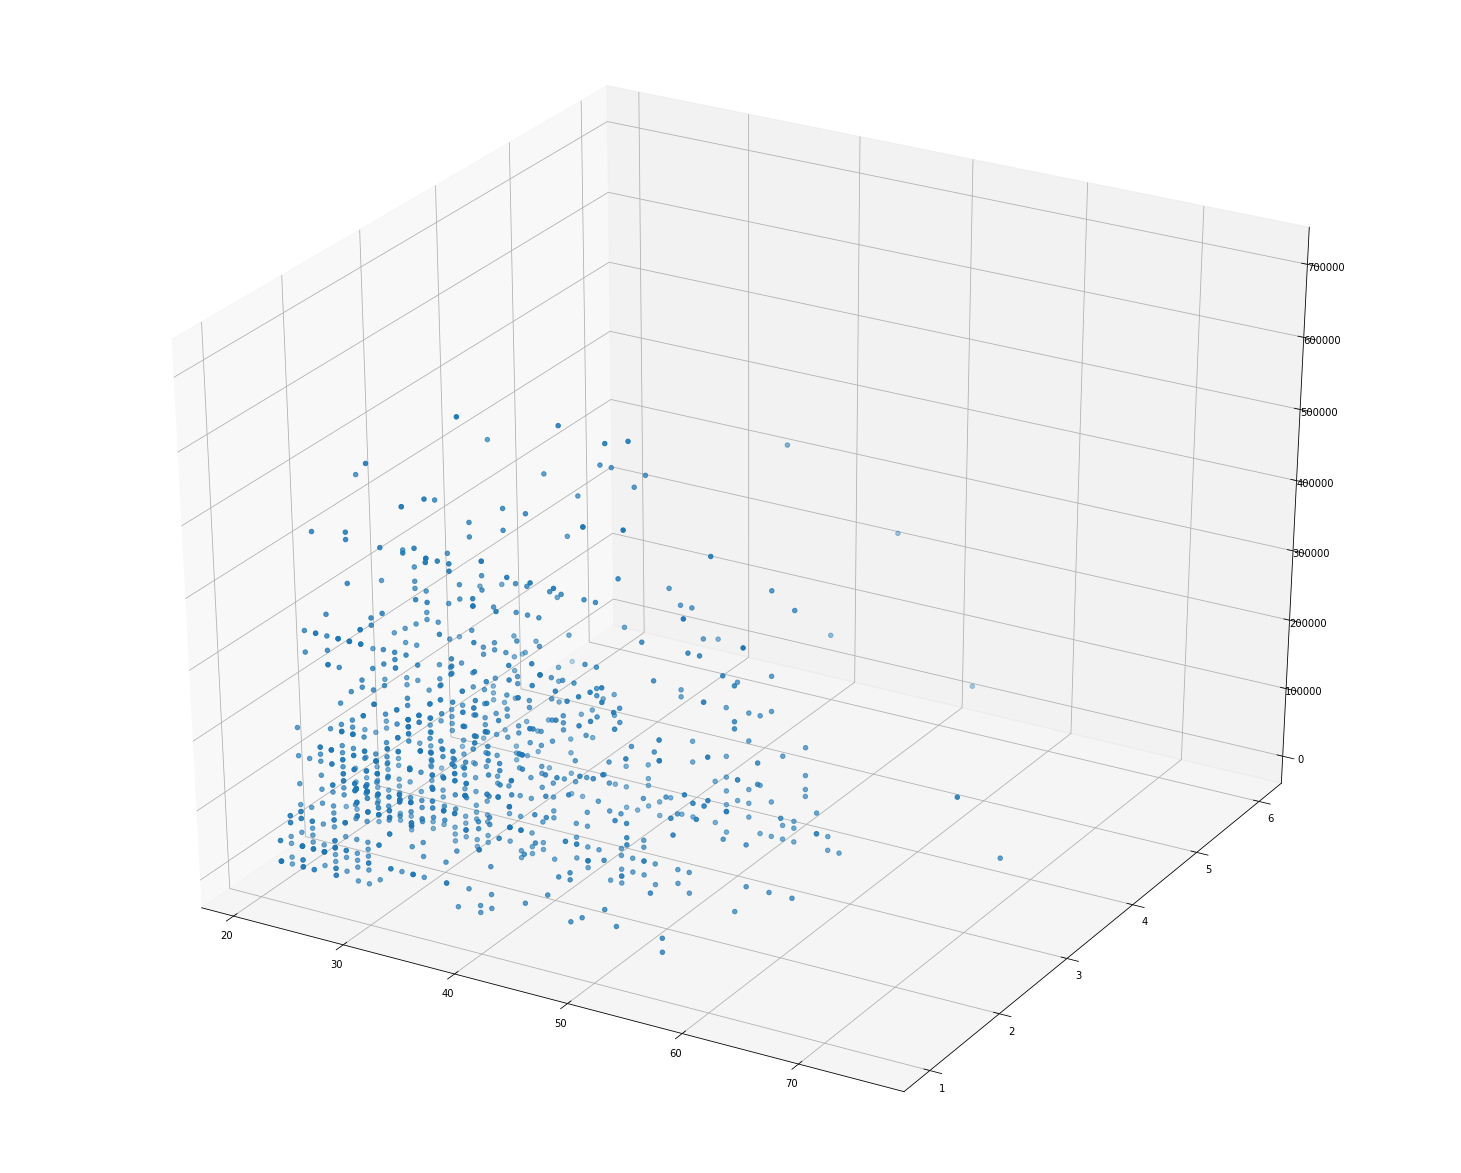

In [177]:
fig = plt.figure(figsize=(20,16))
ax = Axes3D(fig)
ax.scatter(df['AGE'], df['EDUCATION'], df['LIMIT_BAL'])
plt.show()

Rozkład wieku posiadaczy kart kredytowych

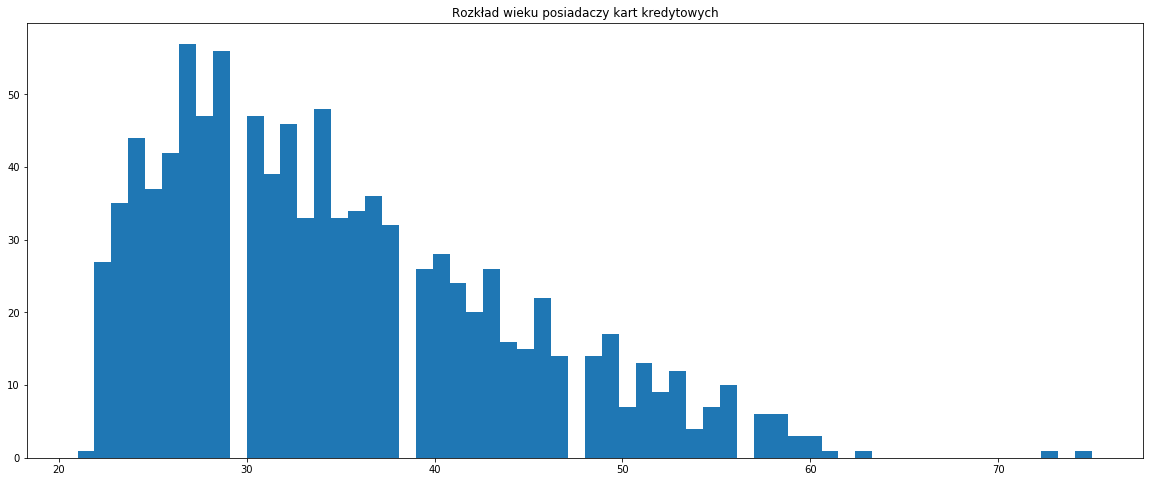

In [178]:
fig = plt.figure(figsize=(20,8))

df['AGE'].hist(bins=60)

plt.title('Rozkład wieku posiadaczy kart kredytowych')
plt.grid(None)

plt.show()

Użytkownicy mają pomiędzy 21, a 70 lat.

Najwięcej użytkowników jest w wieku ok. 30 lat.

Rozkład poziomu zdobytego wykształcenia posiadaczy kart kredytowych

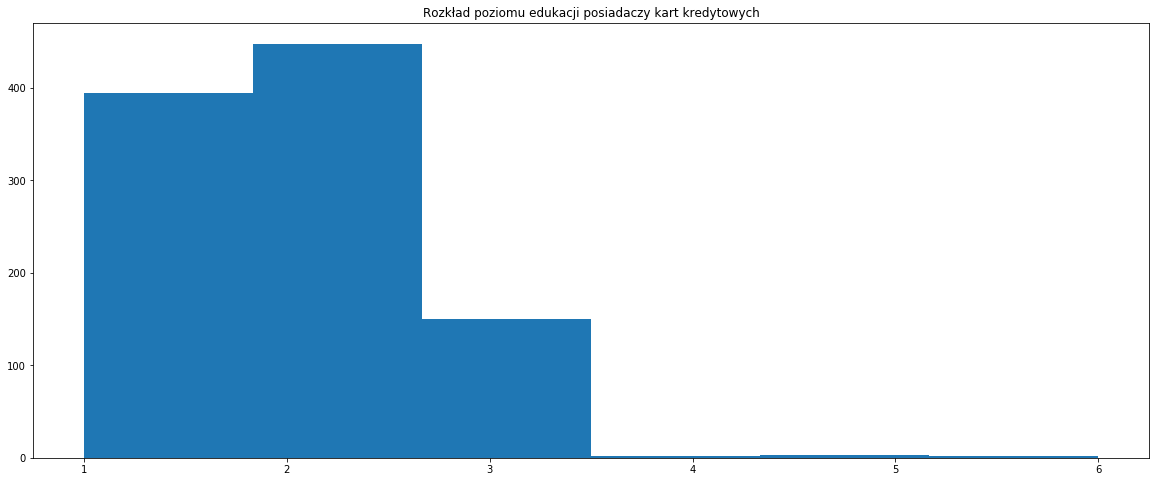

In [179]:
fig = plt.figure(figsize=(20,8))

df['EDUCATION'].hist(bins=6)

plt.title('Rozkład poziomu edukacji posiadaczy kart kredytowych')
plt.grid(None)

plt.show()

Najwięcej jest użytkowników mających wyższym wykształcenie.

Rozkład limitu kart kredytowych

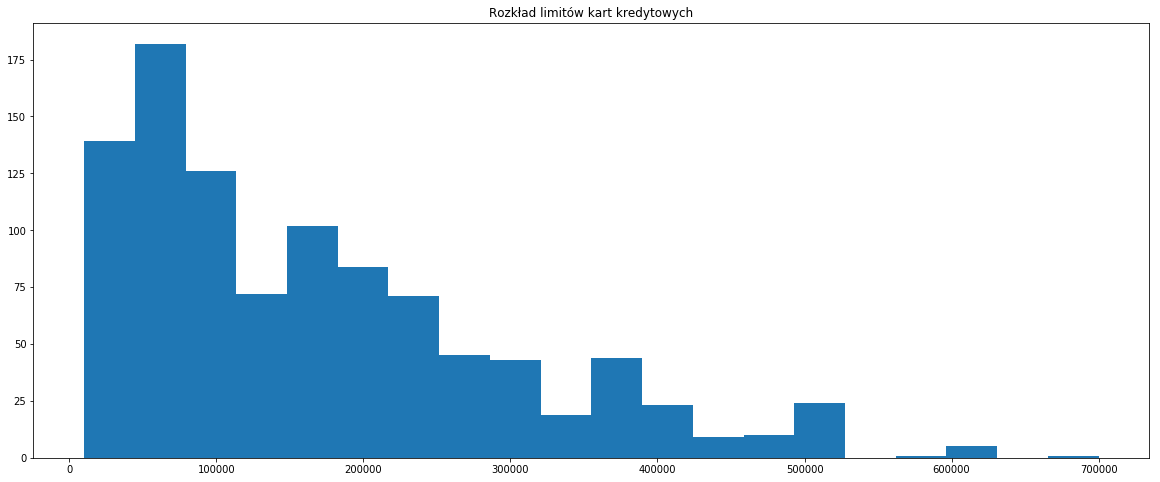

In [180]:
fig = plt.figure(figsize=(20,8))

df['LIMIT_BAL'].hist(bins=20)

plt.title('Rozkład limitów kart kredytowych')
plt.grid(None)

plt.show()

Większość użytkowników ma limity w okolicach 20 000 NT$

In [181]:
def odleglosc_euklidesowa(obserwacja1, obserwacja2):
    return np.sqrt(np.sum((obserwacja1 - obserwacja2) ** 2))

Odległość geometryczna w przestrzeni wielowymiarowej.

Wyliczana dla danych surowych.

In [182]:
df = df[['AGE', 'EDUCATION', 'LIMIT_BAL']]
print(df.iloc[0,:])
print(df.iloc[1,:])

odleglosc_euklidesowa(df.iloc[0], df.iloc[1])

AGE             24.0
EDUCATION        2.0
LIMIT_BAL    20000.0
Name: 0, dtype: float64
AGE              26.0
EDUCATION         2.0
LIMIT_BAL    120000.0
Name: 1, dtype: float64


100000.00002000001

#### Standaryzacja danych

Przed standaryzacją dane wyglądają jak poniżej.

In [183]:
df.head()

AGE  EDUCATION  LIMIT_BAL
0   24          2    20000.0
1   26          2   120000.0
2   34          2    90000.0
3   37          2    50000.0
4   57          2    50000.0

In [184]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

Przy standaryzacji zmienna uzyskuje średnią wartość oczekiwaną zero i odchylenie standardowe jeden. Dzięki niej uzyskano jedną porównywalną miarę statystyczną.

Oto dane po standaryzacji.

In [185]:
df.head()

AGE  EDUCATION  LIMIT_BAL
0 -1.185875   0.298846  -1.126467
1 -0.969040   0.298846  -0.360580
2 -0.101696   0.298846  -0.590346
3  0.223558   0.298846  -0.896701
4  2.391917   0.298846  -0.896701

### Metoda k-średnich

Analiza polegająca na szukaniu i wyodrębnianiu grup obiektów podobnych - skupień.

Wybrano początkową liczbę skupień równą 4.

In [186]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
print(df)

          AGE  EDUCATION  LIMIT_BAL
0   -1.185875   0.298846  -1.126467
1   -0.969040   0.298846  -0.360580
2   -0.101696   0.298846  -0.590346
3    0.223558   0.298846  -0.896701
4    2.391917   0.298846  -0.896701
5    0.223558  -1.035289  -0.896701
6   -0.643786  -1.035289   2.549792
7   -1.294293   0.298846  -0.513757
8   -0.752204   1.632982  -0.207402
9    0.006722   1.632982  -1.126467
10  -0.101696   1.632982   0.252130
11   1.741409  -1.035289   0.711663
12   0.657230   0.298846   3.545446
13  -0.535368   0.298846  -0.743523
14  -0.643786  -1.035289   0.635074
15  -1.294293   1.632982  -0.896701
16  -1.185875  -1.035289  -1.126467
17   1.524573  -1.035289   1.171195
18   1.524573  -1.035289   1.477550
19  -0.643786  -1.035289   0.098953
20   0.440394   1.632982  -0.283991
21   0.440394   0.298846  -0.360580
22  -0.969040   0.298846  -0.743523
23   0.548812  -1.035289   2.166848
24  -1.294293  -1.035289  -0.590346
25  -1.294293   1.632982  -0.896701
26  -0.860622  -1.035289  -0

Tak wyglądają początkowe rekordy, które zostały przypisane do odpowiednich grup.

In [187]:
y = np.array(kmeans.labels_)
y[:300]

array([0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 1,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0,
       0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0,
       0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2,
       2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2,
       2])

Centra skupień (centroidy) przedstawia poniższa macierz.

In [188]:
kmeans.cluster_centers_

array([[-0.67179373, -0.16532159, -0.54774348],
       [ 1.1263457 ,  1.14550904, -0.46073426],
       [ 0.28263169, -0.50933178,  1.14983845]])

In [189]:
def recalculate_for_cluster(n_cluster):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(df)
    kmeans.cluster_centers_
recalculate_for_cluster(3)

Po eksperymentalnym wyznaczeniu centroidów uznano zmienić liczbę klastrów na 3, gdyż w tej postaci centra skupić są od siebie najdalej oddalone.

Centra skupień następnie zostały poddane transformacie odwrotnej, w celu odzyskania (przybliżonych) oryginalnych miejsc na wykresie.

In [190]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[     28.74166667,       1.65208333,   95562.5       ],
       [     45.32692308,       2.63461538,  106923.07692308],
       [     37.54487179,       1.39423077,  317211.53846154]])

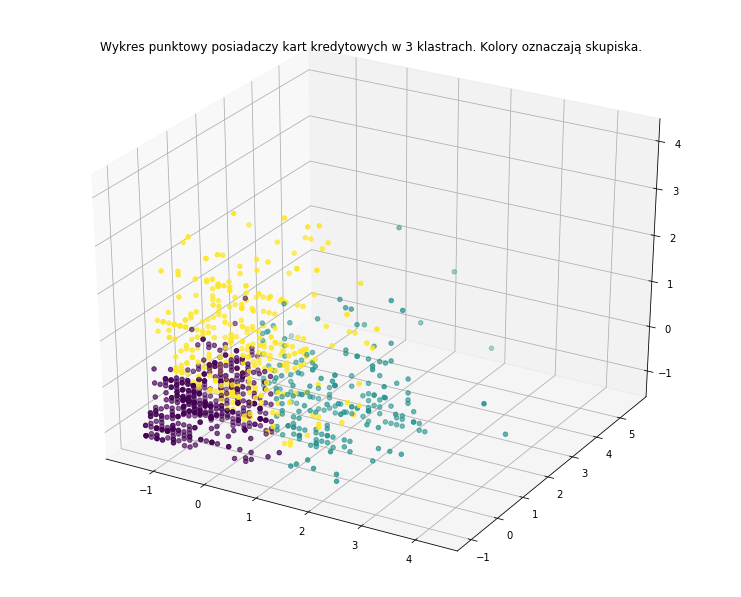

In [191]:
def draw_3d_chart(n_cluster):
    fig = plt.figure(figsize=(10,8))
    ax = Axes3D(fig)
    ax.scatter(
        df['AGE'],
        df['EDUCATION'],
        df['LIMIT_BAL'],
        c=kmeans.labels_
    )
    plt.title('Wykres punktowy posiadaczy kart kredytowych w ' + str(n_cluster) + ' klastrach. Kolory oznaczają skupiska.')
    plt.show()

recalculate_for_cluster(3)
draw_3d_chart(3)

### Ocena jakości klastrowania

In [192]:
from sklearn import metrics

Pierwsza miara jakości to interia. Mówi ona jak daleko są punkty wśród klastrów. Im wartość współczynnika niższa, tym jakość jest wyższa.

In [193]:
kmeans.fit(df)
kmeans.inertia_

1526.9078946346235

Druga miara jakości to wynik Silhouette'a. Waha się on pomiędzy wartościami -1, a 1. Im współczynnik jest bliższy 1, tym jakość jest wyższa.

In [194]:
metrics.silhouette_score(df, kmeans.labels_, metric='euclidean')

0.32553089639418137

Trzecia metoda to metoda Calińskiego i Harabasza. Jakość jest tym wyższa, im wyższy jest współczynnik.

In [195]:
metrics.calinski_harabaz_score(df, kmeans.labels_)

480.93039344744585

In [196]:
inertia_scores = []
silhouette_scores = []
calinski_harabaz_scores = []

def count_results_for_n_clusters(min_clust, max_clust):
    for i in range(min_clust,max_clust):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df)
        inertia_scores.append(kmeans.inertia_)
        silhouette_scores.append(metrics.silhouette_score(df, kmeans.labels_, metric='euclidean'))
        calinski_harabaz_scores.append(metrics.calinski_harabaz_score(df, kmeans.labels_))
        
min_clust = 2
max_clust = 30

count_results_for_n_clusters(min_clust, max_clust)

Poniższy wykres przedstawia wartość współczynnika interia, w zależności od liczby klastrów.

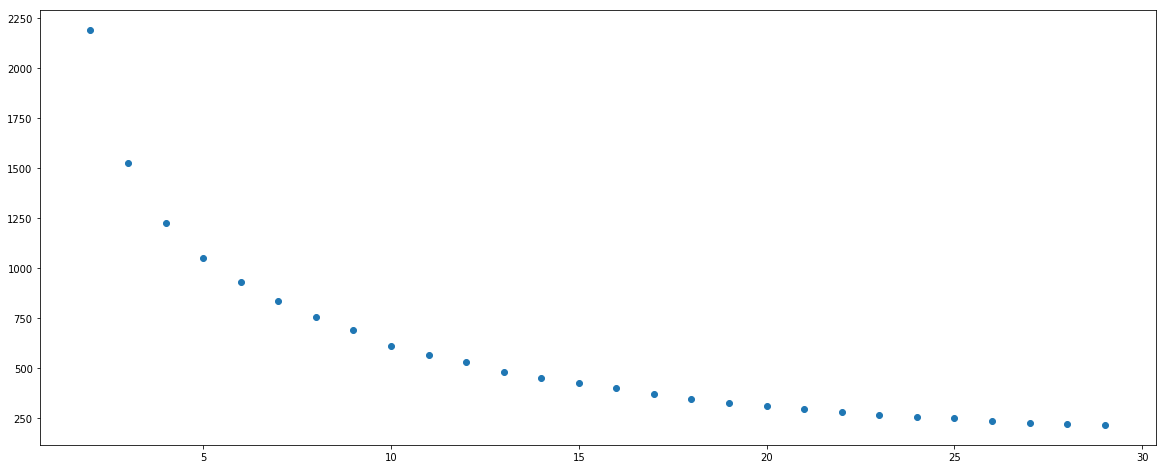

In [197]:
fig = plt.figure(figsize=(20,8))
plt.scatter(x=np.arange(min_clust,max_clust), y=inertia_scores)

Jak widać, na powyższym wykresie - wartość współczynnika maleje wraz ze wzrostem liczby klastrów. Nie onacza to jednak, że powinno wybrać się jak największą liczbę klastrów. Punkty na wykresie można połączyć funkcją kwadratową. Jednym ze sposobów na wybór może być poprowadzenie prostej przez bardziej wypłaszczone punkty. Tą geometryczną metodą wybrano podział na 9 klastrów. Przy wygenerowaniu współczynnika dla 80 klastrów widać liniową zależność bardzo wyraźnie.  

Poniżej przedstawiono punktowy wykres trójwymiarowy wybranych 9 klastrów

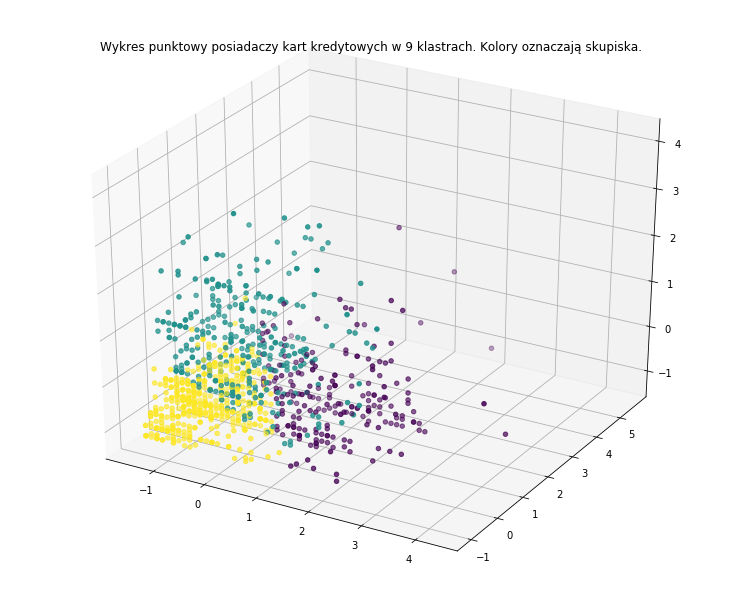

In [198]:
draw_3d_chart(9)

Na poniższym wykresie przedstawiono wartość współczynnika silhouette w zależności od ilości klastrów.

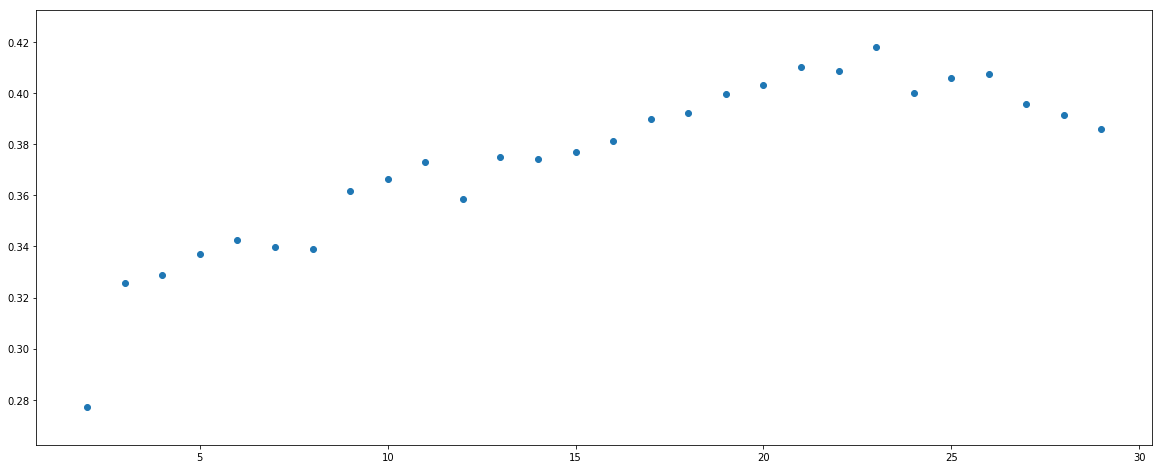

In [199]:
fig = plt.figure(figsize=(20,8))
plt.scatter(x=np.arange(min_clust,max_clust), y=silhouette_scores)

Na powyższym wykresie widać funkcję, która ma wiele maksimów oraz minimów lokalnych. Biorąc pod uwagę minimalną liczbę klastrów tj. pierwsze maksimum lokalne stwierdzić można, iż liczba klastrów powinna być równa 6.

Poniższy wykres przedstawia natomiast wartość współczynnika jakości Calinskiego-Harabasza w funkcji liczby klastrów. 

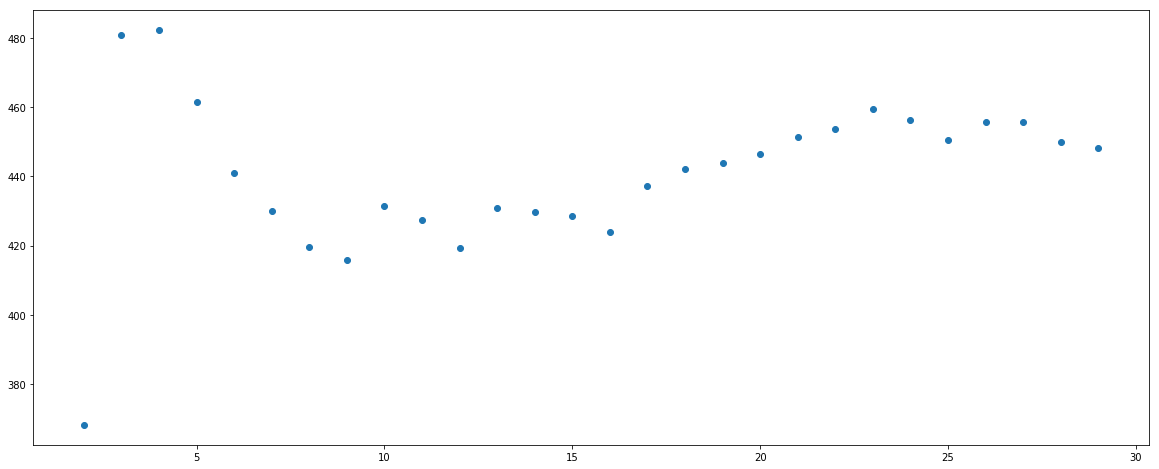

In [200]:
fig = plt.figure(figsize=(20,8))
plt.scatter(x=np.arange(min_clust,max_clust), y=calinski_harabaz_scores)

Podobnie jak na wykresie powyższym - do czynienia mamy tutaj z lokalnymi maksimami oraz minimami. Optymalna liczba klastrów wynosi w tym przypadku wynosi 4. Drugim optimum z kolei jest w tym przypadku 8.

#### Metoda aglomeracyjna

Powyższe metody analizy skupień oparte na podziale mają określoną liczbą skupień na początku i przeszukują różne umiejscowienia punktów w gniazdach w celu znalezienia rozmieszczenia optymalizującego pewną funkcję oceny grupowania. Metody hierarchiczne natomiast stopniowo dzielą nadskupienia lub łączą punkty. Na tej podstawie zidentyfikować dwa różne typy metod hierarchicznych: aglomeracyjne (łączące punkty w coraz większe grupy) i rozdzielające (dzielące grupy).

In [201]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Poniżej przedstawiona została metoda aglomeracyjna. Do oszacowania odległości między skupieniami wykorzystano podejście analizy wariancji. 

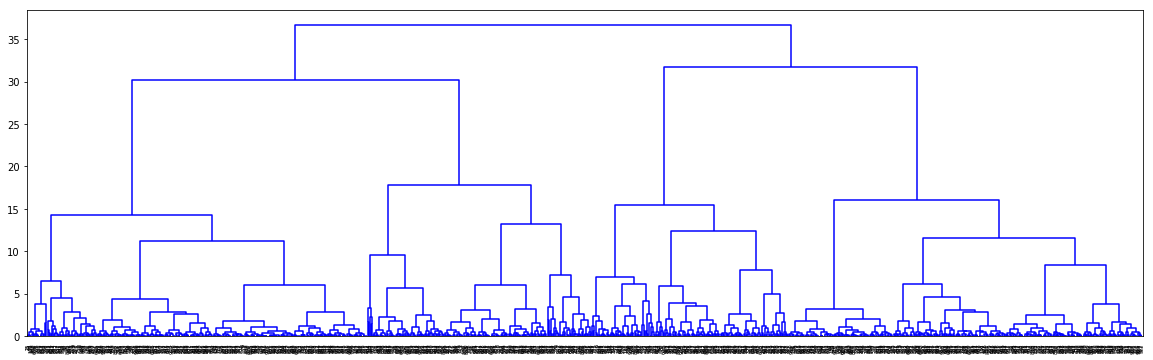

In [202]:
linkage_matrix = linkage(df, 'ward')
plt.figure(figsize=(20,6))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

Po wyniku stwierdzić można, iż optymalną liczbą klastrów powinna być liczba 4, ewentualnie 6.

In [203]:
linkage_matrix[0:30,];

Macierz obiektów podzielonych na klasy w przypadku 6 klastrów wygląda, jak poniżej przedstawiono.

In [204]:
numer_klastra = fcluster(linkage_matrix, t=6, criterion='maxclust')
print(numer_klastra)

[1 1 3 3 3 6 4 1 1 1 1 3 4 1 6 1 5 4 4 6 1 3 1 4 5 1 5 1 2 5 6 1 5 4 4 6 4
 1 5 6 6 5 1 3 5 6 5 2 4 5 2 2 4 6 6 4 1 1 6 4 4 3 5 3 3 3 3 6 1 1 5 4 1 6
 6 1 1 4 1 4 4 6 1 4 2 1 4 1 6 2 3 6 5 3 1 3 4 6 1 3 6 6 4 1 1 1 3 4 3 4 6
 2 4 5 3 5 6 1 4 4 1 4 3 4 5 1 4 6 3 2 5 6 4 4 1 1 6 1 2 5 3 1 1 1 5 5 1 6
 1 3 1 5 4 4 1 6 6 1 4 2 6 1 4 6 3 5 4 1 3 1 4 6 1 5 6 2 5 1 1 1 6 1 4 1 1
 3 6 4 1 1 6 5 6 6 3 5 1 5 4 1 6 6 6 1 4 2 3 4 1 4 6 6 2 3 4 2 4 3 1 6 4 4
 4 4 1 6 4 3 1 1 5 1 1 1 1 6 1 6 4 3 5 6 1 6 6 3 3 1 6 2 1 1 1 6 4 1 3 1 2
 3 4 1 6 6 6 1 1 2 3 1 1 6 3 1 4 3 4 5 1 1 5 4 1 5 1 3 6 4 1 4 6 1 3 1 6 6
 1 1 6 6 3 4 2 5 6 1 4 4 2 5 4 1 6 4 5 1 3 4 2 1 1 6 1 1 4 4 4 1 4 6 4 3 5
 4 5 6 6 1 1 6 1 3 6 6 6 6 1 1 1 1 5 6 6 3 2 3 1 4 1 6 4 4 1 6 6 4 3 1 6 1
 1 6 6 2 6 2 3 6 6 1 1 3 1 1 1 2 5 3 3 6 4 4 4 1 4 6 6 1 1 1 6 2 6 3 6 3 1
 4 6 6 5 6 6 1 4 1 6 5 3 6 5 6 4 4 4 1 2 6 5 1 1 6 5 4 4 1 5 1 5 5 1 5 5 6
 6 1 6 3 2 1 4 4 4 6 3 3 1 6 4 3 4 3 4 6 2 3 6 1 4 6 4 4 1 1 1 1 3 3 4 6 4
 1 1 2 3 1 6 4 1 6 1 3 1 

W przypadku 4 klastrów:

In [205]:
numer_klastra = fcluster(linkage_matrix, t=4, criterion='maxclust')
print(numer_klastra)

[1 1 2 2 2 4 3 1 1 1 1 2 3 1 4 1 4 3 3 4 1 2 1 3 4 1 4 1 2 4 4 1 4 3 3 4 3
 1 4 4 4 4 1 2 4 4 4 2 3 4 2 2 3 4 4 3 1 1 4 3 3 2 4 2 2 2 2 4 1 1 4 3 1 4
 4 1 1 3 1 3 3 4 1 3 2 1 3 1 4 2 2 4 4 2 1 2 3 4 1 2 4 4 3 1 1 1 2 3 2 3 4
 2 3 4 2 4 4 1 3 3 1 3 2 3 4 1 3 4 2 2 4 4 3 3 1 1 4 1 2 4 2 1 1 1 4 4 1 4
 1 2 1 4 3 3 1 4 4 1 3 2 4 1 3 4 2 4 3 1 2 1 3 4 1 4 4 2 4 1 1 1 4 1 3 1 1
 2 4 3 1 1 4 4 4 4 2 4 1 4 3 1 4 4 4 1 3 2 2 3 1 3 4 4 2 2 3 2 3 2 1 4 3 3
 3 3 1 4 3 2 1 1 4 1 1 1 1 4 1 4 3 2 4 4 1 4 4 2 2 1 4 2 1 1 1 4 3 1 2 1 2
 2 3 1 4 4 4 1 1 2 2 1 1 4 2 1 3 2 3 4 1 1 4 3 1 4 1 2 4 3 1 3 4 1 2 1 4 4
 1 1 4 4 2 3 2 4 4 1 3 3 2 4 3 1 4 3 4 1 2 3 2 1 1 4 1 1 3 3 3 1 3 4 3 2 4
 3 4 4 4 1 1 4 1 2 4 4 4 4 1 1 1 1 4 4 4 2 2 2 1 3 1 4 3 3 1 4 4 3 2 1 4 1
 1 4 4 2 4 2 2 4 4 1 1 2 1 1 1 2 4 2 2 4 3 3 3 1 3 4 4 1 1 1 4 2 4 2 4 2 1
 3 4 4 4 4 4 1 3 1 4 4 2 4 4 4 3 3 3 1 2 4 4 1 1 4 4 3 3 1 4 1 4 4 1 4 4 4
 4 1 4 2 2 1 3 3 3 4 2 2 1 4 3 2 3 2 3 4 2 2 4 1 3 4 3 3 1 1 1 1 2 2 3 4 3
 1 1 2 2 1 4 3 1 4 1 2 1 

Uśrednione wyniki dla poszczególnych klastrów wynoszą jak w tabeli.

In [206]:
srednie = df.groupby(numer_klastra).mean()
srednie

AGE  EDUCATION  LIMIT_BAL
1 -0.695684   0.587544  -0.489148
2  1.236537   0.643996  -0.582725
3  0.533411   0.116919   1.498003
4 -0.409562  -1.035289   0.008395

Centra skupień następnie zostały poddane transformacie odwrotnej, w celu odzyskania (przybliżonych) oryginalnych miejsc na wykresie.

In [207]:
scaler.inverse_transform(srednie)

array([[     28.52131148,       2.21639344,  103213.1147541 ],
       [     46.34328358,       2.25870647,   90995.02487562],
       [     39.85795455,       1.86363636,  362670.45454545],
       [     31.16037736,       1.        ,  168176.10062893]])

W przypadku 4 klastrów dane na wykresie trójwymiarowym wyglądają jak poniżej przedstawiono.

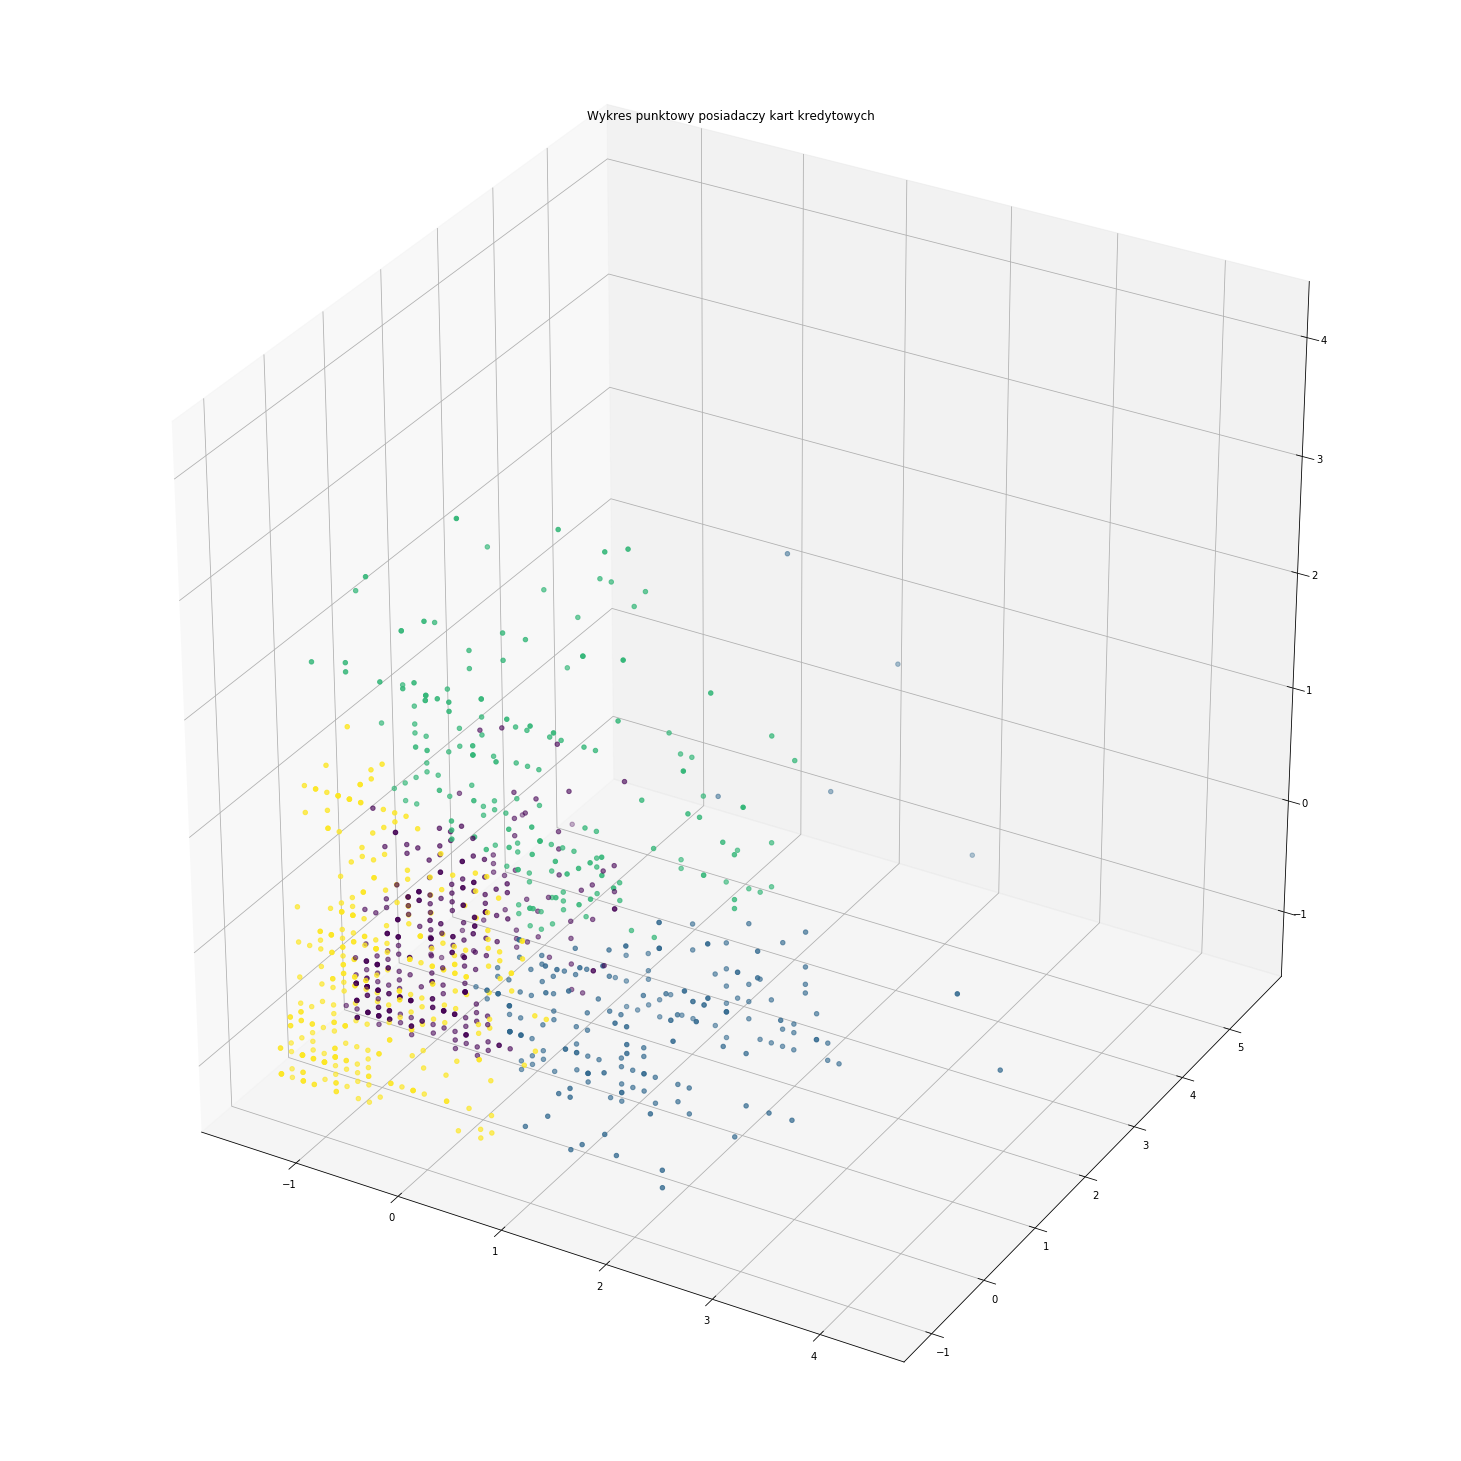

In [208]:
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)

ax.scatter(
    df['AGE'],
    df['EDUCATION'],
    df['LIMIT_BAL'],
    c=numer_klastra
)
plt.title('Wykres punktowy posiadaczy kart kredytowych')
plt.show()

## Podsumowanie i wnioski

Wybrano liczbę klastrów na poziomie 3.

Analiza jakości dla liczby klastrów równej 3 wyniosła (po zaokrągleniu wyników):
* Interia: 1527 [punktów]
* Calińskiego i Harabasza: 480 [punktów]
* Silhouette'a: 0,325 [punktów]

Powyższe współczynniki porównano następnie do najlepszych, wyznaczonych metodami analitycznymi oraz graficznymi dla każdej z metod jakościowych. Najlepsze współczynniki jakości oraz liczba klastrów wyniosła:
* Interia: 9 klastrów, 750 [punktów]
* Calińskiego i Harabasza: 4 klastry, 485 [punktów]
* Silhouette'a : 6 klastrów, 0,345 [punktów]

Otrzymane wyniki najlepszego podziału dla zachowania najwyższej jakości klastrowania różnią się od siebie. Wybrana początkowo liczba klastrów okazała się być zbyt mała. Powinna przyjmować wartość minimum 4.

Metodą aglomeracyjną natomiast wybrano podział na 4 klastry. Wynik ten zgadza się z metodą jakościową Calińskiego i Harabasza. Jest on też zbliżony do początkowo wybranej ilości klastrów.

Na podstawie powyższych wyników stwierdzić można, że optymalną liczbą klastrów dla danych użytkowników kart kredytowych jest cztery.

Nie ma metody zawsze dającej lepsze rezultaty niż inne, a efektywność metody zależy od typu danych. W przypadku metody aglomeracyjnej - efektywność i czytelność maleje wraz z rosnącą liczbą danych.